In [13]:
#imporrt libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

**Loading the dataset**

The features in th dataset are ,

No (Index/Serial Number): A unique identifier for each row in the dataset.

Year: The year in which the PM2.5 and meteorological data were recorded (2010–2015).

Month: The month (1–12) in which the data was recorded.Useful for capturing seasonal variations in PM2.5 levels.For example, higher levels in winter due to coal-based heating.

Day: The day of the month when the data was recorded (1–31).

Hour: The hour of the day when the data was recorded (0–23).

Dew Point: Dew point temperature.

Temperature: Atmospheric temperature in Celsius.

Pressure: Atmospheric pressure in hPa.

CBWD (Combined Wind Direction): A categorical variable representing wind direction (e.g., NW, NE, SW, SE).

IWS (Integrated Wind Speed):  The cumulative wind speed in meters per second (m/s) over a specific period.

IS (Integrated Snowfall): The cumulative snowfall in millimeters (mm) over a specific period.

IR (Integrated Rainfall): The cumulative rainfall in millimeters (mm) over a specific period.

PM2.5 (Target Variable): The concentration of fine particulate matter (PM2.5) in micrograms per cubic meter (µg/m³).




In [14]:
zip_path = "beijing+pm2+5+data.zip"

# Opening the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print("Files in zip:", file_list)  

    with z.open("PRSA_data_2010.1.1-2014.12.31.csv") as f:
        df_raw = pd.read_csv(f, delimiter=",", low_memory=False)

print(df_raw.head())

Files in zip: ['PRSA_data_2010.1.1-2014.12.31.csv']
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [15]:
df_raw.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


The dataset doesn't have any null values except the column pm2.5

In [16]:
df_raw.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [17]:
#create a datetime feature from year,month,day and hour features
df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# Format the Datetime column as yyyy-mm-dd HH:mm:ss
df_raw['Datetime'] = df_raw['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# first few rows to verify
df_raw.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [18]:
df = df_raw.copy()

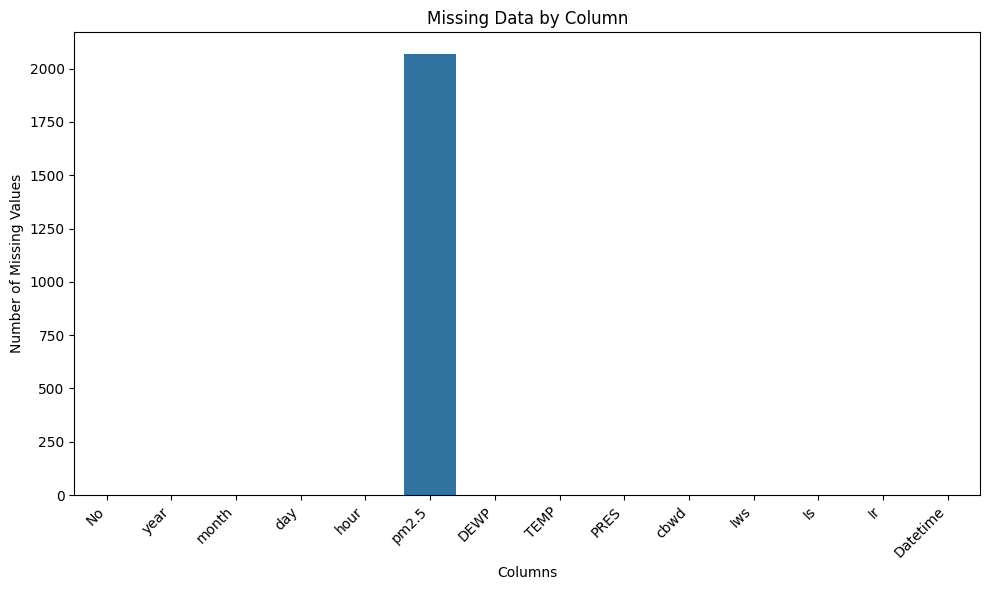

In [19]:
# Check for missing values
missing_counts = df_raw.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Data by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [20]:
df_raw.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
Datetime       0
dtype: int64

<Axes: title={'center': 'NaN Counts Over Time'}, xlabel='Datetime'>

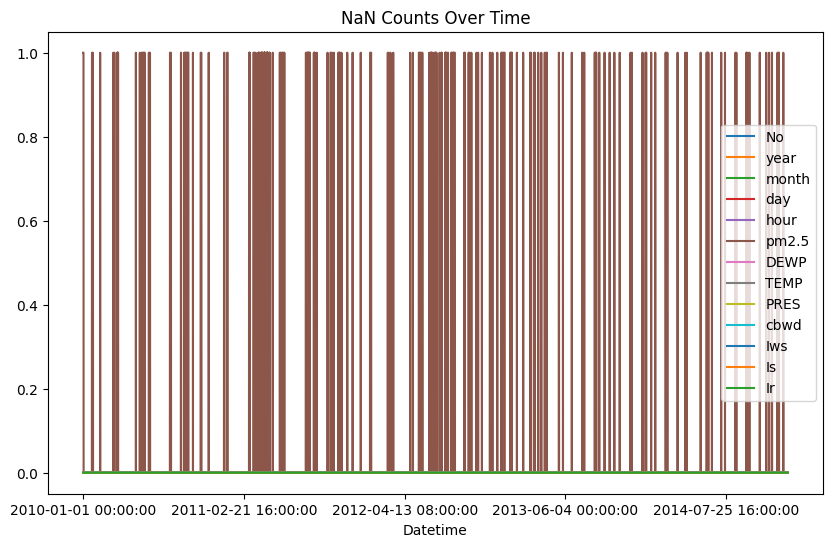

In [21]:
# Drop unwanted columns for NaN analysis (excluding 'Datetime' or 'Date')
df_na = df_raw.drop('Datetime', axis=1).isna().groupby(df_raw['Datetime'], sort=False).sum().reset_index()

# Plot NaN counts over time using 'Datetime' as x-axis
df_na.plot(x='Datetime', y=df_na.columns[1:], figsize=(10, 6), title="NaN Counts Over Time")

In [22]:
#linear interpolation for numeric columns to fill missing values
df_numeric = df_raw.drop(columns=['Datetime'])  # Exclude non-numeric columns
df_numeric = df_numeric.interpolate(method='linear', limit_direction='both')

# Replace original numeric columns with imputed values
df_raw.update(df_numeric)

# Verify missing data is handled
print(df_raw.isna().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5       0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
Datetime    0
dtype: int64


/var/folders/80/hnfw_r755zsgd6zb_n_95hyh0000gn/T/ipykernel_48454/3684524465.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_numeric = df_numeric.interpolate(method='linear', limit_direction='both')


In [23]:
desc = df_raw.describe()

print(desc)

                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.261809      1.817246     12.448521   1016.447654     23.889140   
std       90.944915     14.433440     12.198613    

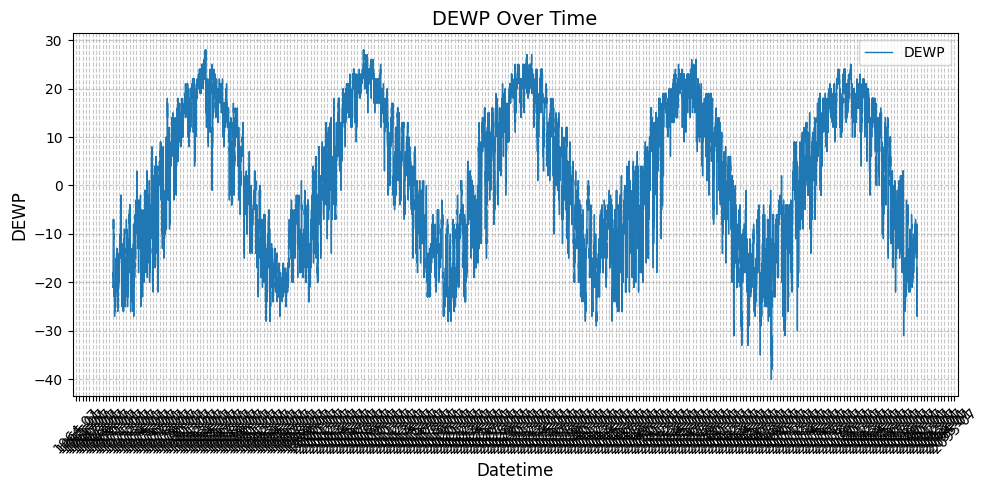

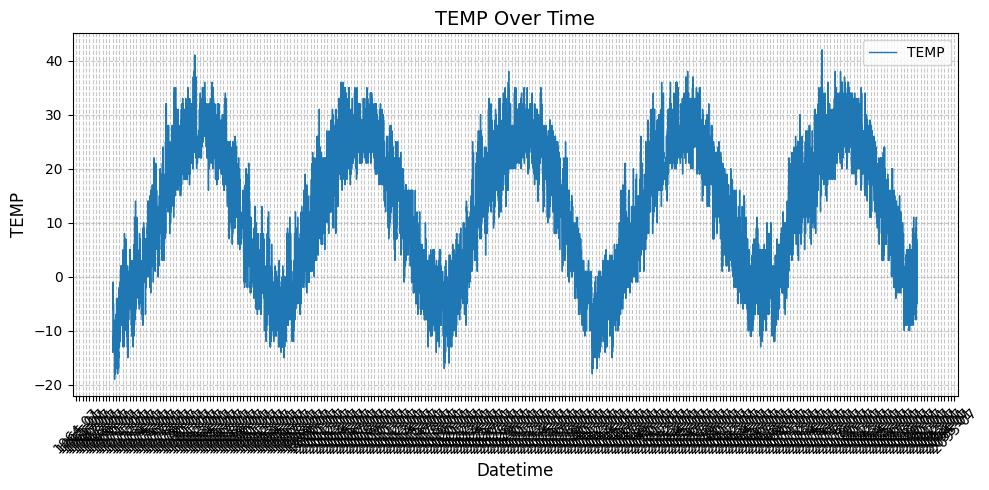

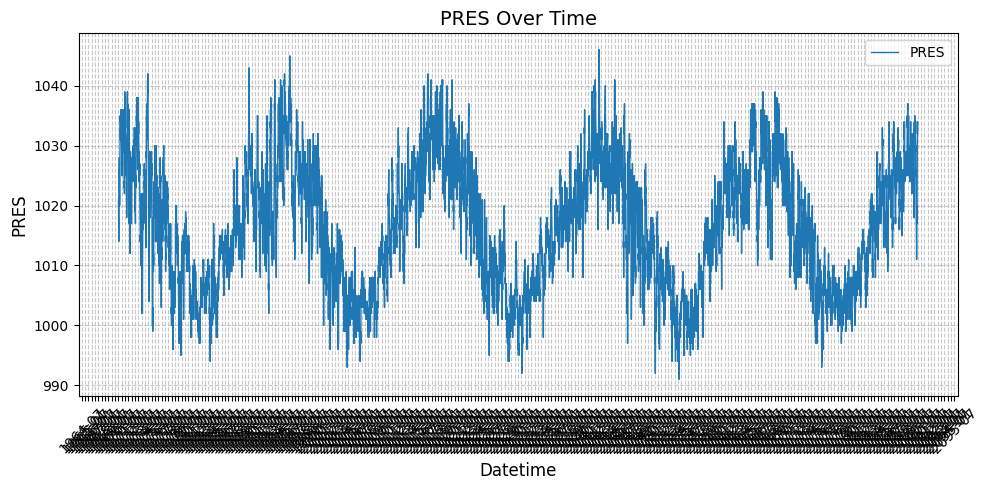

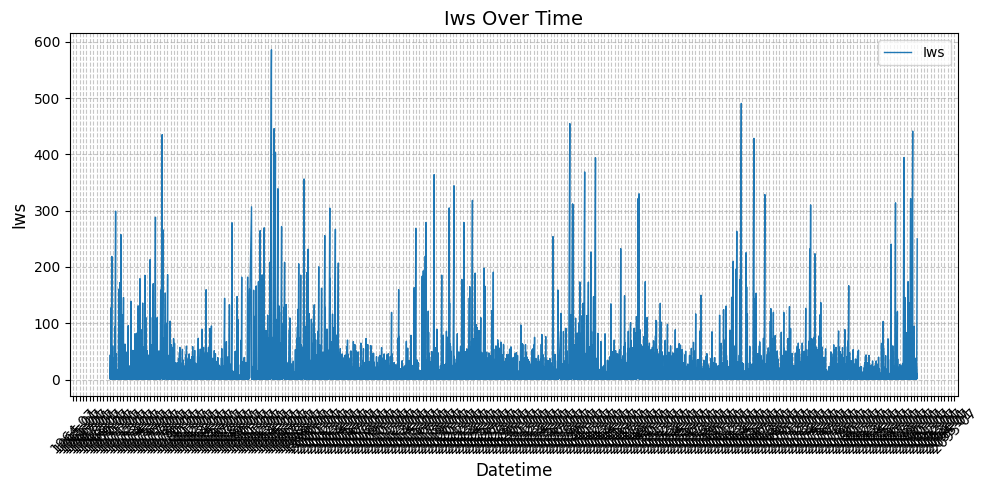

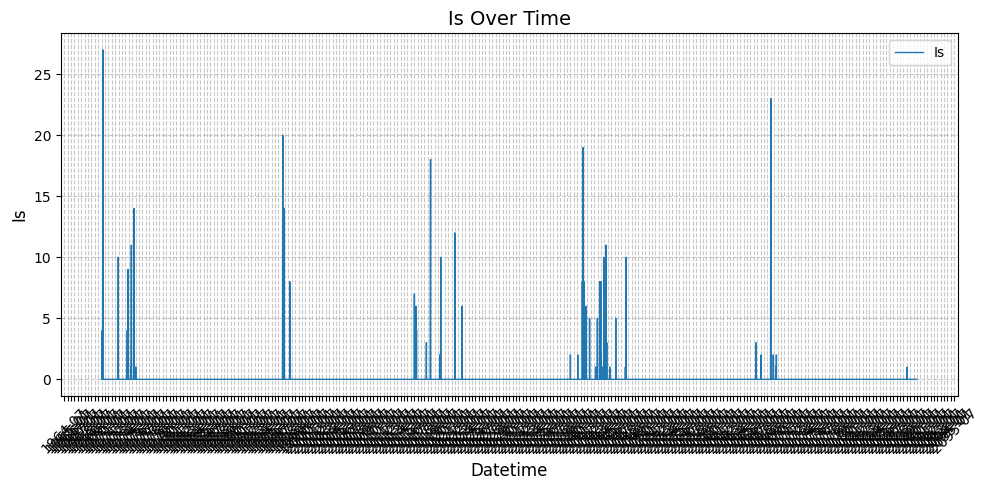

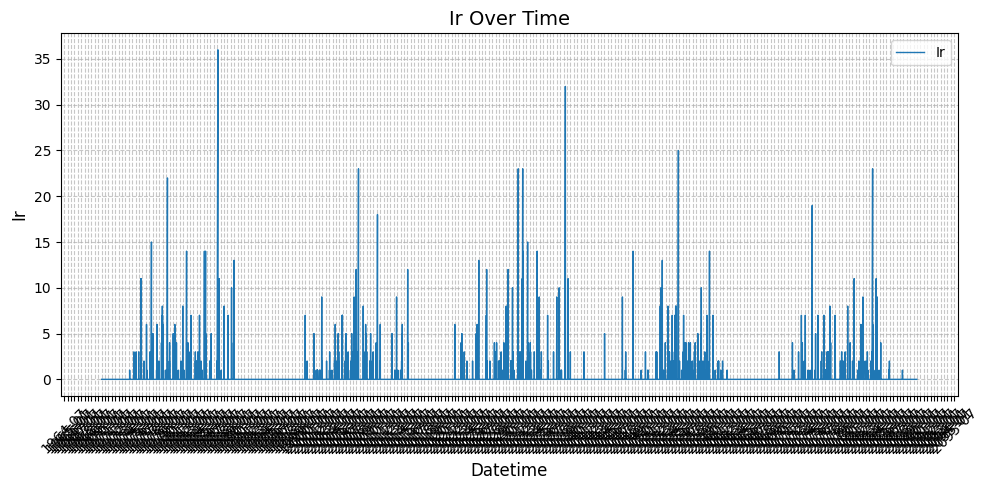

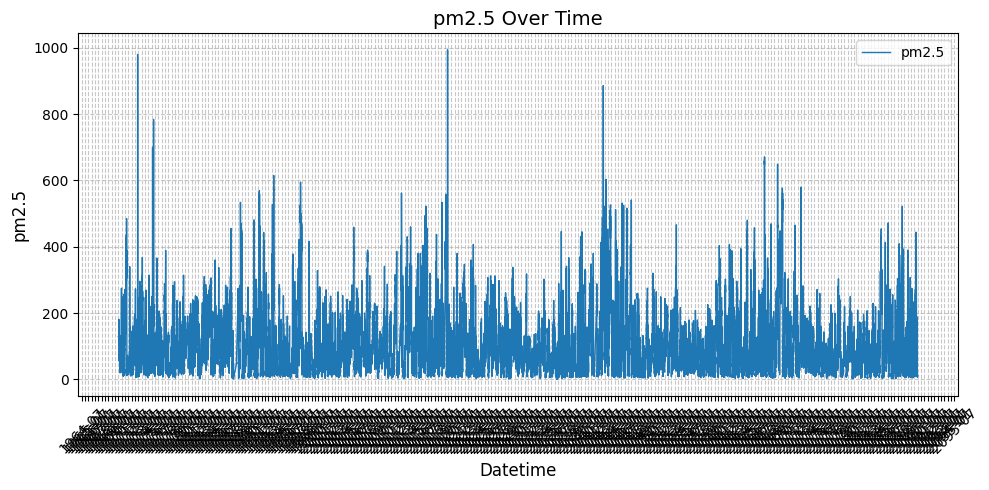

In [24]:
variables_to_plot = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot each variable
for variable in variables_to_plot:
    plt.figure(figsize=(10, 5))
    plt.plot(df_raw['Datetime'], df_raw[variable], label=variable, linewidth=1)
    plt.title(f"{variable} Over Time", fontsize=14)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Fix x-axis ticks to show only every 6 months
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 6 months
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

    # Avoid overlapping labels
    plt.xticks(rotation=45, fontsize=10)

    # Add grid and adjust layout
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

/var/folders/80/hnfw_r755zsgd6zb_n_95hyh0000gn/T/ipykernel_48454/3725914754.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M')  # 'M' represents monthly frequency


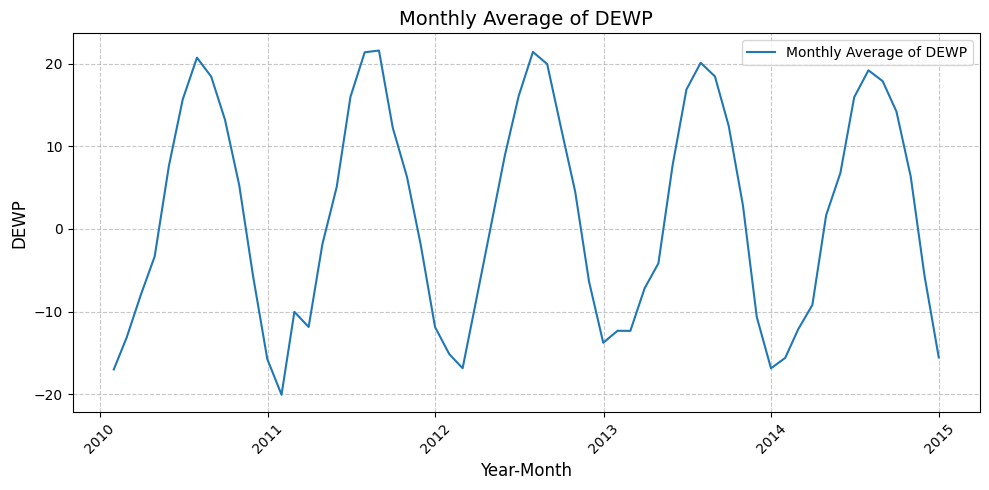

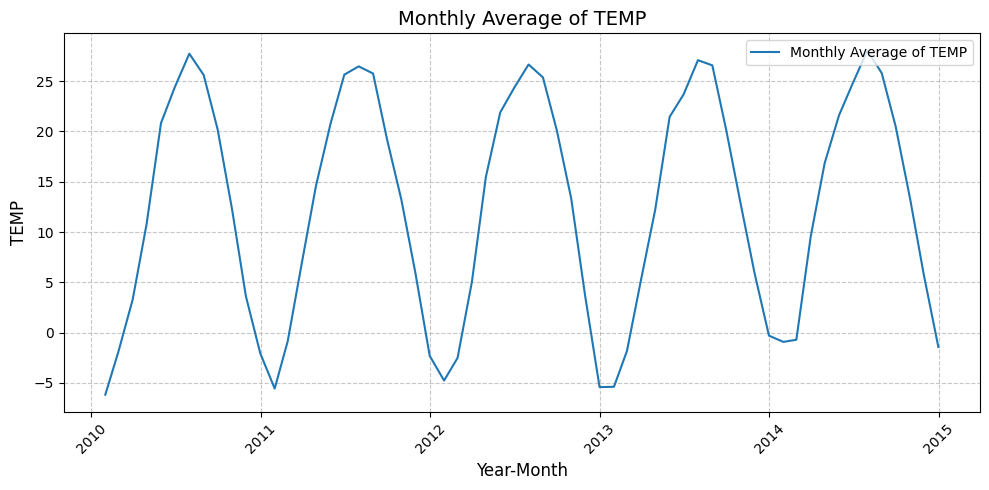

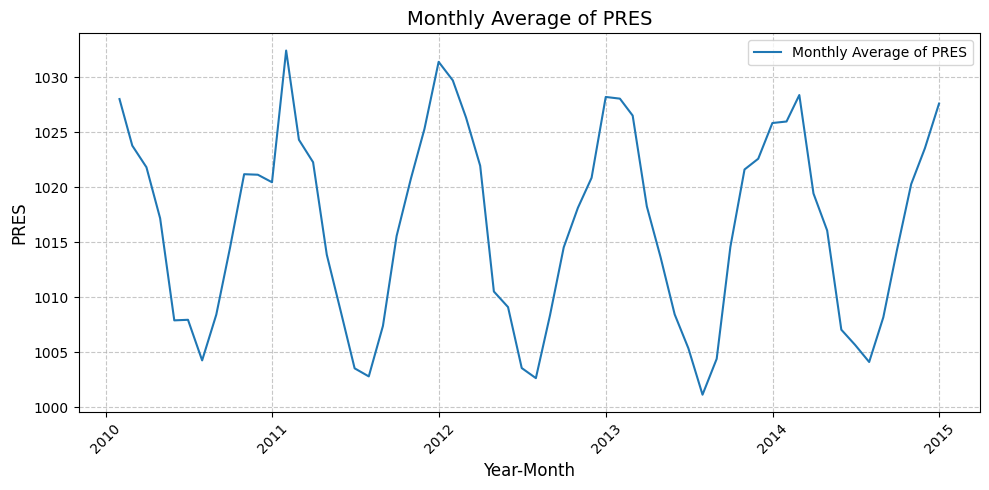

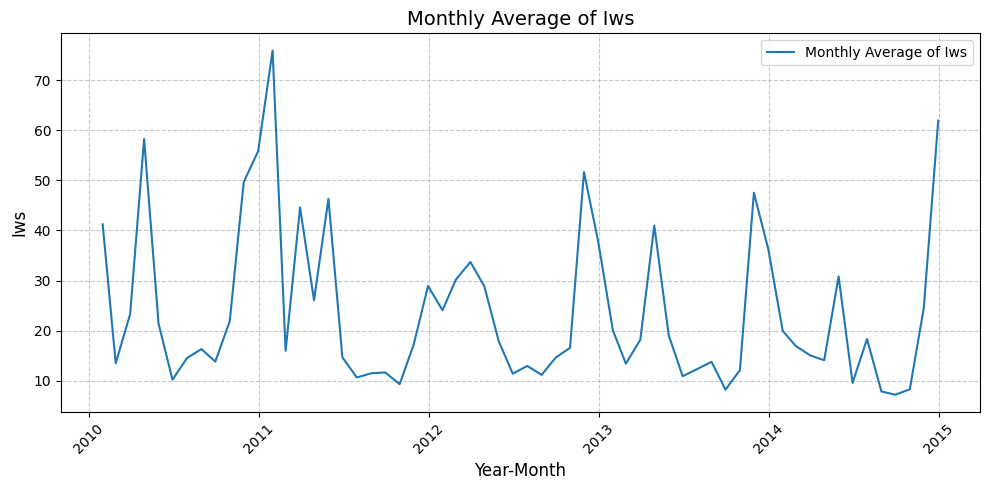

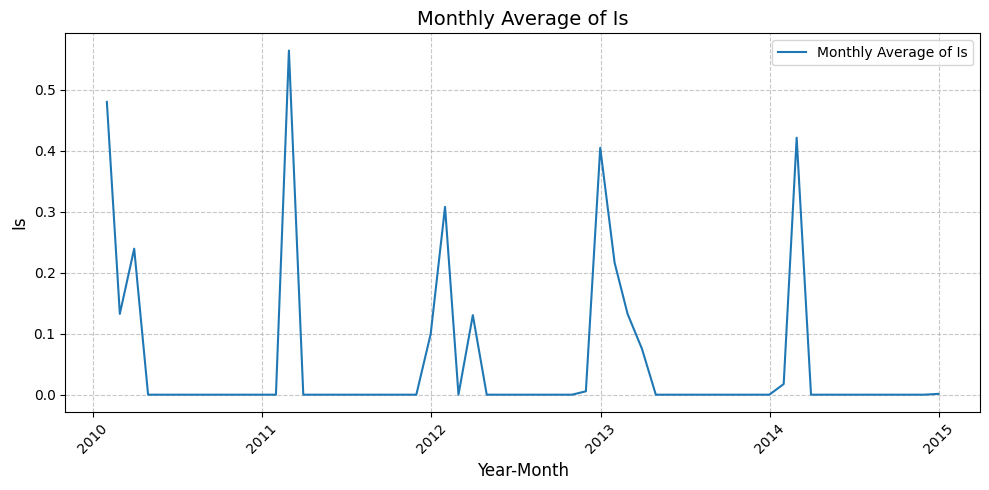

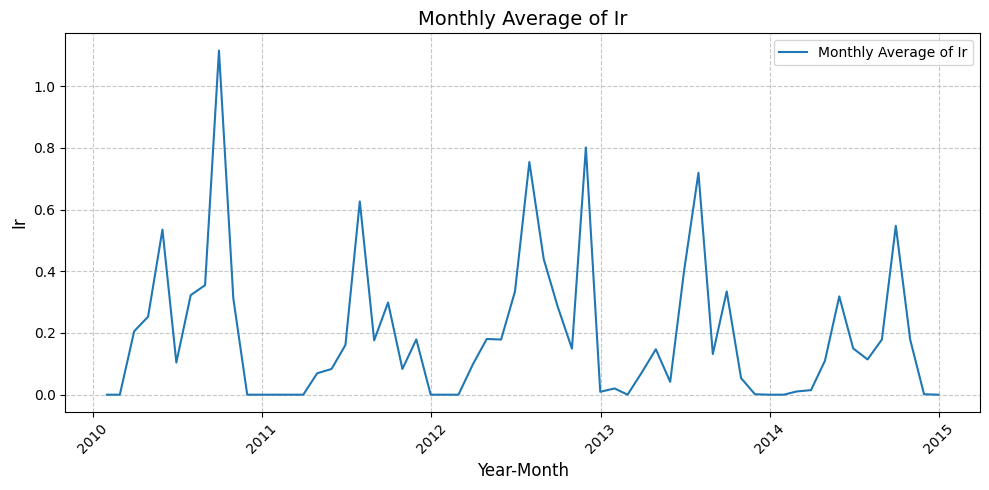

In [25]:
# Combine year, month, day, and hour to create 'Datetime'
df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# 'Datetime' as the index
df_raw.set_index('Datetime', inplace=True)

# Group by monthly intervals and calculate the mean
monthly_avg = df_raw.groupby(
    pd.Grouper(freq='M')  # 'M' represents monthly frequency
)[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].mean().reset_index()

# Function to plot the monthly average
def plot_monthly_average(data, variables, datetime_column):
    for variable in variables:
        plt.figure(figsize=(10, 5))
        plt.plot(data[datetime_column], data[variable], label=f"Monthly Average of {variable}", linewidth=1.5)
        plt.title(f"Monthly Average of {variable}", fontsize=14)
        plt.xlabel("Year-Month", fontsize=12)
        plt.ylabel(variable, fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.legend(loc='upper right', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# the plotting function
plot_monthly_average(
    data=monthly_avg,
    variables=['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'],
    datetime_column='Datetime'
)

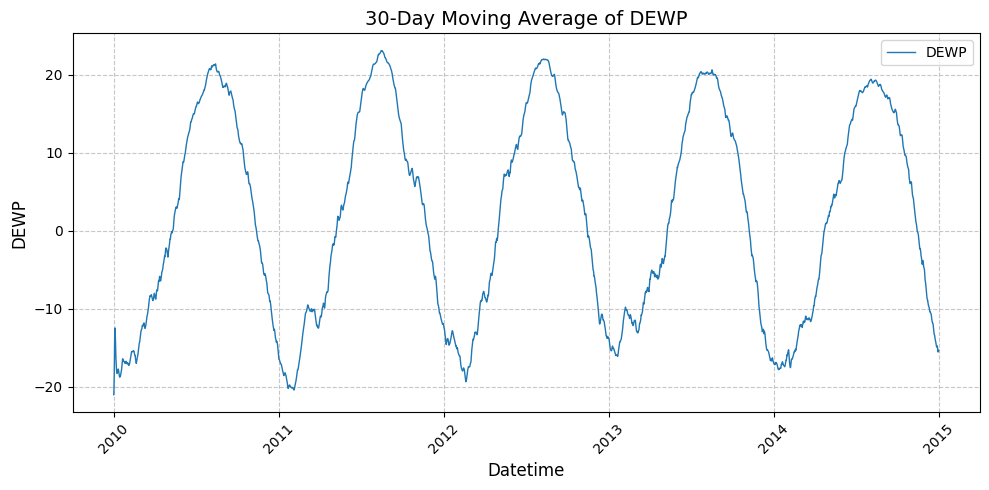

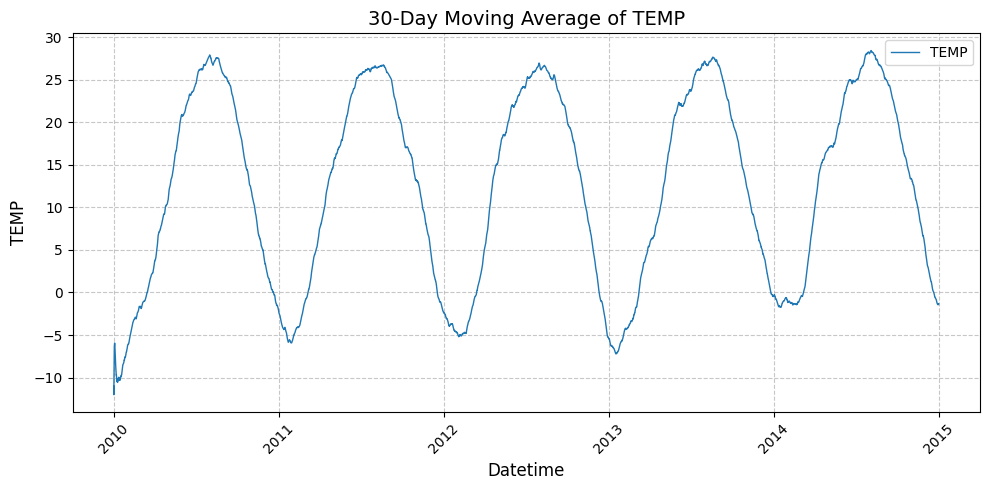

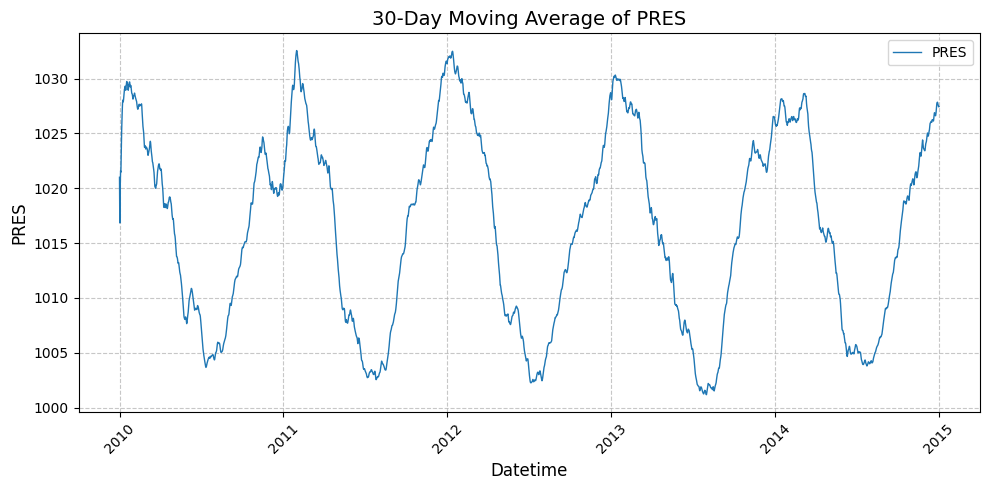

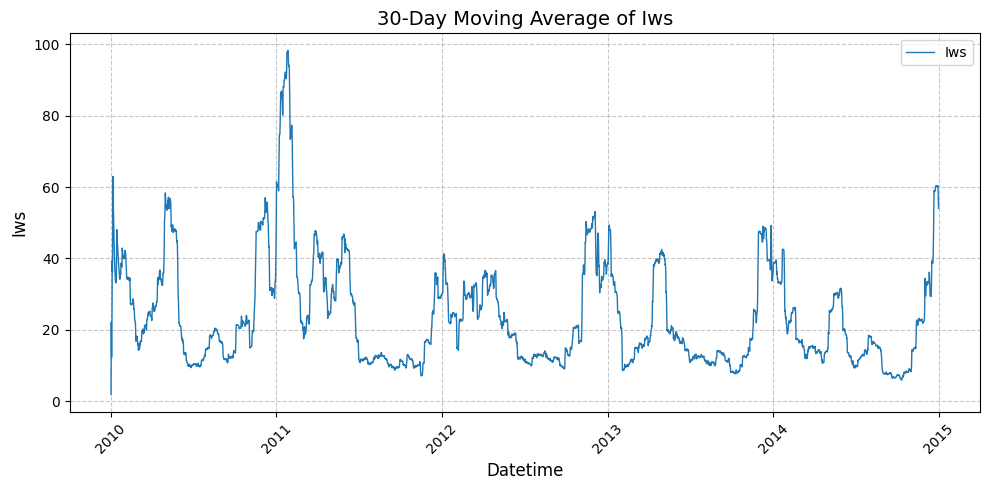

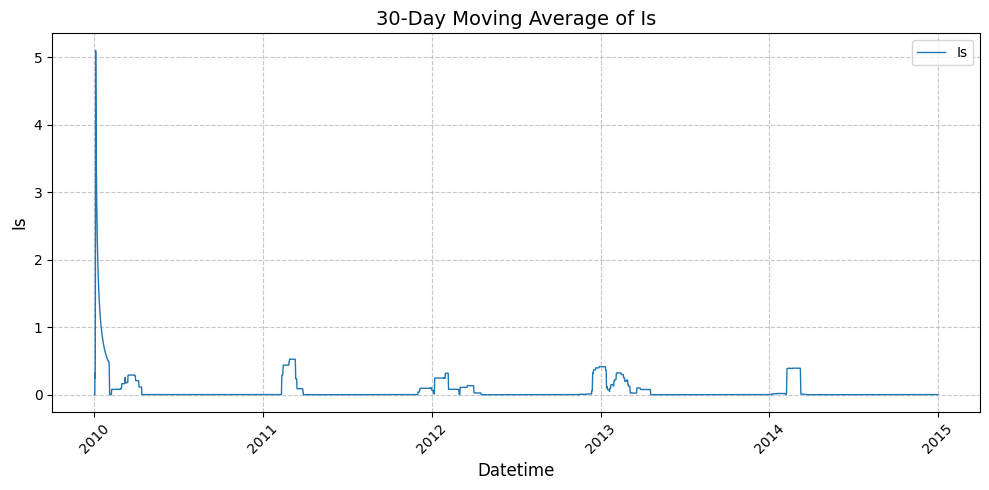

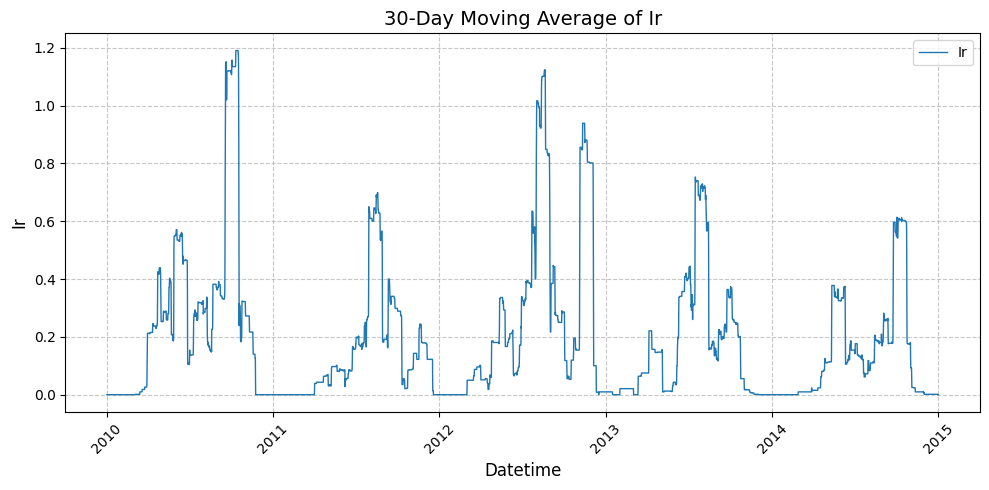

In [26]:
if 'Datetime' not in df_raw.columns:
    df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# the moving average
window_size = 30 * 24  # 30 days * 24 hours = 720 rows (assuming hourly data)

# a new DataFrame for moving averages
df_moving_avg = df_raw[['Datetime', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].copy()

# Applying rolling mean
for variable in ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']:
    df_moving_avg[variable] = df_moving_avg[variable].rolling(window=window_size, min_periods=1).mean()

# Plot the moving averages
for variable in ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']:
    plt.figure(figsize=(10, 5))
    plt.plot(df_moving_avg['Datetime'], df_moving_avg[variable], label=variable, linewidth=1)
    plt.title(f"30-Day Moving Average of {variable}", fontsize=14)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Lets take a look at correlation matrix for the main features

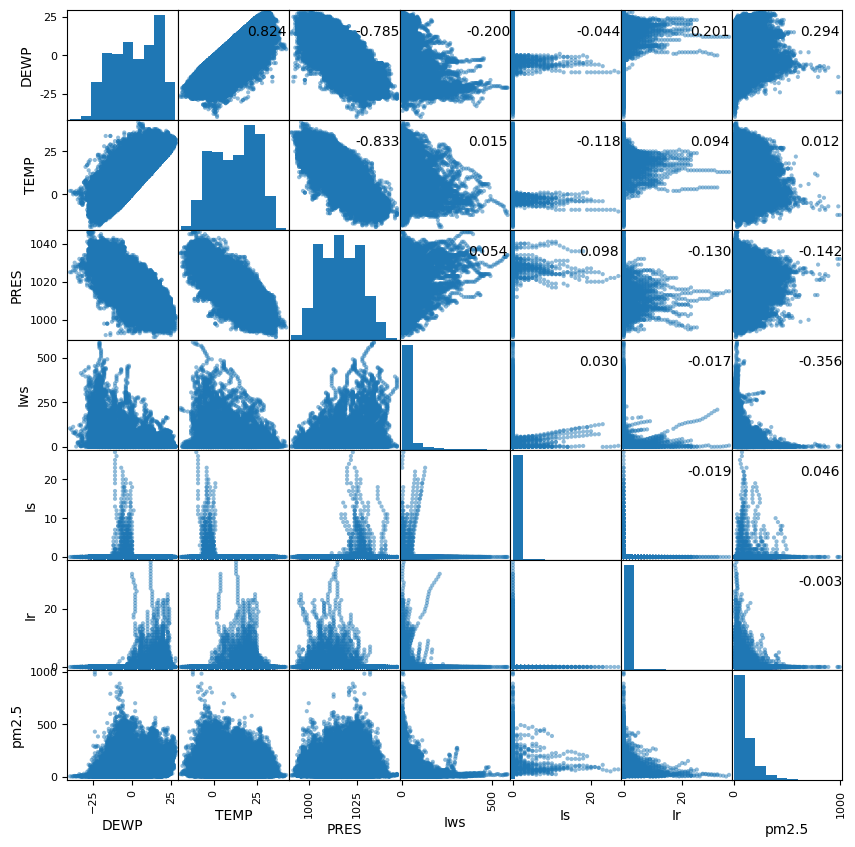

In [27]:
axes = pd.plotting.scatter_matrix(df_raw[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']], alpha=0.5,figsize = [10,10])
corr = df_raw[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [28]:
df_moving_avg.head()

,Datetime,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,-21.0,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2010-01-01 01:00:00,-21.0,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,2010-01-01 02:00:00,-21.0,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,2010-01-01 03:00:00,-21.0,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,2010-01-01 04:00:00,-20.8,-12.000000,1019.40,7.246000,0.0,0.0,129.0


In [29]:
df_raw.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
Datetime,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
2010-01-01 01:00:00,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2010-01-01 02:00:00,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
2010-01-01 03:00:00,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
2010-01-01 04:00:00,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [30]:
if 'Datetime' in df_moving_avg.index.names:
    print("'Datetime' is in the index.")
elif 'Datetime' in df_moving_avg.columns:
    print("'Datetime' is a column.")
else:
    print("'Datetime' is neither in the index nor a column.")

'Datetime' is in the index.


In [31]:
# Verify the result
df_raw.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
Datetime,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
2010-01-01 01:00:00,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2010-01-01 02:00:00,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
2010-01-01 03:00:00,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
2010-01-01 04:00:00,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [32]:
# Remove the 'Datetime' column from df_moving_avg (if it exists)
if 'Datetime' in df_moving_avg.columns:
    df_moving_avg = df_moving_avg.drop(columns='Datetime')

# Verify the result
print(df_moving_avg.head())

                     DEWP       TEMP     PRES       Iws   Is   Ir  pm2.5
Datetime                                                                
2010-01-01 00:00:00 -21.0 -11.000000  1021.00  1.790000  0.0  0.0  129.0
2010-01-01 01:00:00 -21.0 -11.500000  1020.50  3.355000  0.0  0.0  129.0
2010-01-01 02:00:00 -21.0 -11.333333  1020.00  4.473333  0.0  0.0  129.0
2010-01-01 03:00:00 -21.0 -12.000000  1019.75  5.815000  0.0  0.0  129.0
2010-01-01 04:00:00 -20.8 -12.000000  1019.40  7.246000  0.0  0.0  129.0


In [33]:
# Remove columns in df_raw that have the same names as in df_moving_avg (excluding the index)
columns_to_drop = [col for col in df_raw.columns if col in df_moving_avg.columns]
df_raw_filtered = df_raw.drop(columns=columns_to_drop, errors='ignore')

# Merge the two DataFrames on the 'Datetime' index
merged_df = pd.merge(
    df_raw_filtered,
    df_moving_avg,
    left_index=True,   # Merge on the 'Datetime' index of df_raw
    right_index=True,  # Merge on the 'Datetime' index of df_moving_avg
    how='inner'        # Use inner join to keep only matching rows
)

# Display the result
merged_df.head()

,No,year,month,day,hour,cbwd,Datetime,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NW,2010-01-01 00:00:00,-21.0,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2,2010,1,1,1,NW,2010-01-01 01:00:00,-21.0,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,3,2010,1,1,2,NW,2010-01-01 02:00:00,-21.0,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,4,2010,1,1,3,NW,2010-01-01 03:00:00,-21.0,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,5,2010,1,1,4,NW,2010-01-01 04:00:00,-20.8,-12.000000,1019.40,7.246000,0.0,0.0,129.0


In [34]:
merged_df.head()

,No,year,month,day,hour,cbwd,Datetime,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NW,2010-01-01 00:00:00,-21.0,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2,2010,1,1,1,NW,2010-01-01 01:00:00,-21.0,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,3,2010,1,1,2,NW,2010-01-01 02:00:00,-21.0,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,4,2010,1,1,3,NW,2010-01-01 03:00:00,-21.0,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,5,2010,1,1,4,NW,2010-01-01 04:00:00,-20.8,-12.000000,1019.40,7.246000,0.0,0.0,129.0


Correlation Matrix:
           DEWP      TEMP      PRES       Iws        Is        Ir     pm2.5
DEWP   1.000000  0.966303 -0.901822 -0.619877 -0.344264  0.602646 -0.068616
TEMP   0.966303  1.000000 -0.946358 -0.552976 -0.421175  0.535339 -0.090266
PRES  -0.901822 -0.946358  1.000000  0.453904  0.334760 -0.497139  0.108766
Iws   -0.619877 -0.552976  0.453904  1.000000  0.132667 -0.276594 -0.060423
Is    -0.344264 -0.421175  0.334760  0.132667  1.000000 -0.210726  0.033409
Ir     0.602646  0.535339 -0.497139 -0.276594 -0.210726  1.000000 -0.059904
pm2.5 -0.068616 -0.090266  0.108766 -0.060423  0.033409 -0.059904  1.000000


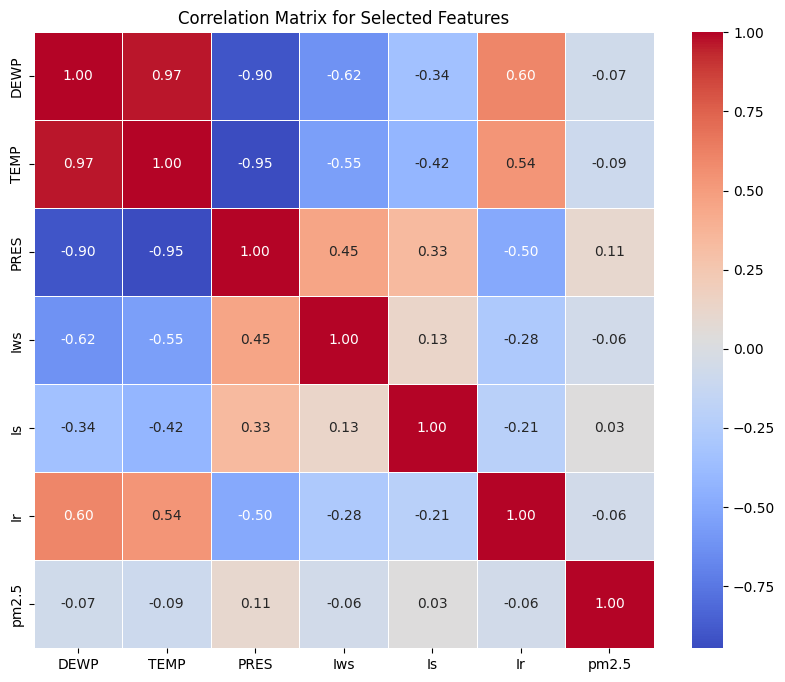

In [35]:
# Select the features of interest
selected_features = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'pm2.5']
df_selected = merged_df[selected_features]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

In [36]:
merged_df = merged_df.drop(columns='DEWP', errors='ignore')

merged_df.head()

,No,year,month,day,hour,cbwd,Datetime,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NW,2010-01-01 00:00:00,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2,2010,1,1,1,NW,2010-01-01 01:00:00,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,3,2010,1,1,2,NW,2010-01-01 02:00:00,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,4,2010,1,1,3,NW,2010-01-01 03:00:00,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,5,2010,1,1,4,NW,2010-01-01 04:00:00,-12.000000,1019.40,7.246000,0.0,0.0,129.0


In [115]:
# the file path where you want to save the CSV
file_path = "merged_data.csv"

# Save the DataFrame to a CSV file
merged_df.to_csv(file_path, index=True)  # Include the index (Datetime) in the CSV

# Confirm the file was saved
print(f"DataFrame saved to {file_path}")

DataFrame saved to merged_data.csv


In [44]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEWP    43824 non-null  float64
 1   TEMP    43824 non-null  float64
 2   PRES    43824 non-null  float64
 3   Iws     43824 non-null  float64
 4   Is      43824 non-null  float64
 5   Ir      43824 non-null  float64
 6   pm2.5   43824 non-null  float64
dtypes: float64(7)
memory usage: 2.7 MB


Training LSTM model for PM 2.5
Epoch 1/50


/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9657 - val_loss: 0.9239
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9177 - val_loss: 0.9189
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8948 - val_loss: 0.8794
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8589 - val_loss: 0.8544
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8656 - val_loss: 0.8357
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8344 - val_loss: 0.8217
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7921 - val_loss: 0.7892
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7911 - val_loss: 0.7819
Epoch 9/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7816 - val_loss: 0.7645
Epoch 10/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7528 - val_loss: 0.7260
Epoch 11/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7379 - val_loss: 0.7240
Epoch 12/50
1096/1096 ━━━━━━━━━━━━━━━━━━━

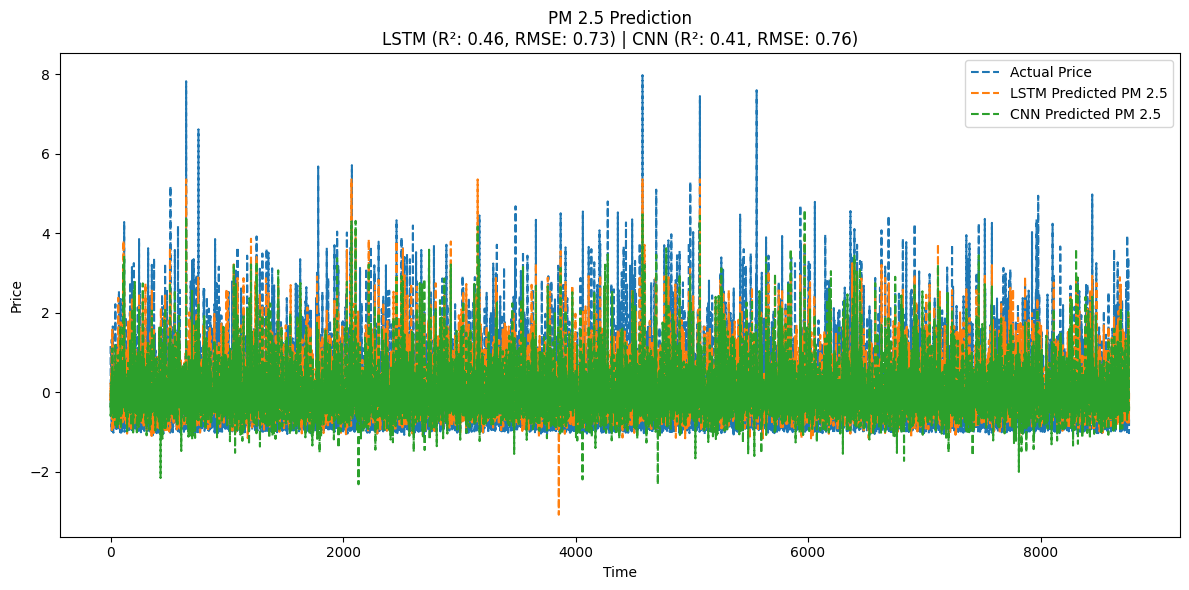

    Stock   LSTM_R²  LSTM_RMSE    CNN_R²  CNN_RMSE
0  PM 2.5  0.464228   0.730251  0.414334  0.763497


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

# Placeholder for results
results = []

# Load the dataset (ensure `data_tesla` is defined)
merged_df = df_selected
# Clean and standardize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()
# Group by each stock
grouped_stocks = merged_df

# Iterate through each stock group
#for stock_label, stock_data in grouped_stocks:
Independent_features = [col for col in merged_df.columns.tolist() if col not in ['pm2.5']]
target = 'pm2.5'  # Target variable
ts_data = grouped_stocks[Independent_features + [target]].dropna()
    
# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ts_data)
scaled_df = pd.DataFrame(scaled_data, columns=Independent_features + [target])
    
# Create sequences for LSTM and CNN
timesteps = 10
X, y = [], []
for i in range(timesteps, len(scaled_df)):
    X.append(scaled_df.iloc[i-timesteps:i, :-1].values)
    y.append(scaled_df.iloc[i, -1])

X, y = np.array(X), np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
    
    # Define the CNN model
cnn_model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
cnn_model.compile(optimizer='adam', loss='mse')
    
    # Train both models
print(f"Training LSTM model for PM 2.5")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
print(f"Training CNN model for PM 2.5")
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Make predictions for both models
lstm_y_pred = lstm_model.predict(X_test).flatten()
cnn_y_pred = cnn_model.predict(X_test).flatten()
    
    # Calculate R² and RMSE for both models
lstm_r2 = r2_score(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_y_pred))
    
cnn_r2 = r2_score(y_test, cnn_y_pred)
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_y_pred))
    
results.append({
        'Stock': 'PM 2.5',
        'LSTM_R²': lstm_r2,
        'LSTM_RMSE': lstm_rmse,
        'CNN_R²': cnn_r2,
        'CNN_RMSE': cnn_rmse
    })
    
    # Plot the results side-by-side
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', linestyle='--')
plt.plot(lstm_y_pred, label='LSTM Predicted PM 2.5', linestyle='--')
plt.plot(cnn_y_pred, label='CNN Predicted PM 2.5', linestyle='--')
plt.title(f'PM 2.5 Prediction\nLSTM (R²: {lstm_r2:.2f}, RMSE: {lstm_rmse:.2f}) | CNN (R²: {cnn_r2:.2f}, RMSE: {cnn_rmse:.2f})')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

Training LSTM model for PM 2.5
Epoch 1/50


/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9712 - val_loss: 0.9324
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9293 - val_loss: 0.8993
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9001 - val_loss: 0.8717
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8691 - val_loss: 0.8480
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8781 - val_loss: 0.8226
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8200 - val_loss: 0.8285
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7953 - val_loss: 0.8037
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8068 - val_loss: 0.7627
Epoch 9/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7609 - val_loss: 0.7480
Epoch 10/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7603 - val_loss: 0.7367
Epoch 11/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7307 - val_loss: 0.7240
Epoch 12/50
1096/1096 ━━━━━━━━━━━━━━━━━━━

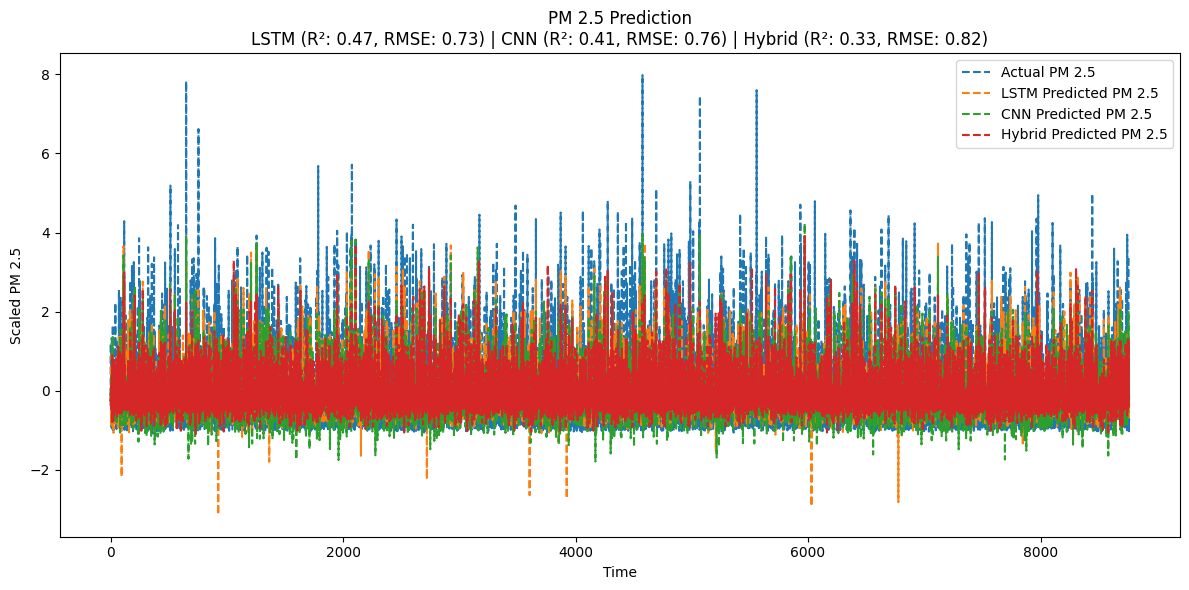

    Stock   LSTM_R²  LSTM_RMSE    CNN_R²  CNN_RMSE  Hybrid_R²  Hybrid_RMSE
0  PM 2.5  0.468413   0.727394  0.412352  0.764788   0.327746     0.817992


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten, MaxPooling1D, Dropout
import matplotlib.pyplot as plt

# Placeholder for results
results = []

# Load the dataset (ensure `df_selected` is defined)
merged_df = df_selected.copy()
# Clean and standardize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()

# Define independent features and target variable
Independent_features = [col for col in merged_df.columns.tolist() if col not in ['pm2.5']]
target = 'pm2.5'
ts_data = merged_df[Independent_features + [target]].dropna()

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ts_data)
scaled_df = pd.DataFrame(scaled_data, columns=Independent_features + [target])

# Create sequences for modeling (LSTM, CNN, Hybrid)
timesteps = 10
X, y = [], []
for i in range(timesteps, len(scaled_df)):
    X.append(scaled_df.iloc[i-timesteps:i, :-1].values)
    y.append(scaled_df.iloc[i, -1])
X, y = np.array(X), np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')

# Define the Hybrid model (CNN + LSTM)
hybrid_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])
hybrid_model.compile(optimizer='adam', loss='mse')

# Train the models
print("Training LSTM model for PM 2.5")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("Training CNN model for PM 2.5")
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("Training Hybrid model for PM 2.5")
hybrid_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions with each model
lstm_y_pred = lstm_model.predict(X_test).flatten()
cnn_y_pred = cnn_model.predict(X_test).flatten()
hybrid_y_pred = hybrid_model.predict(X_test).flatten()

# Calculate R² and RMSE for each model
lstm_r2 = r2_score(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_y_pred))

cnn_r2 = r2_score(y_test, cnn_y_pred)
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_y_pred))

hybrid_r2 = r2_score(y_test, hybrid_y_pred)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_y_pred))

results.append({
    'Stock': 'PM 2.5',
    'LSTM_R²': lstm_r2,
    'LSTM_RMSE': lstm_rmse,
    'CNN_R²': cnn_r2,
    'CNN_RMSE': cnn_rmse,
    'Hybrid_R²': hybrid_r2,
    'Hybrid_RMSE': hybrid_rmse
})

# Plot predictions from all models
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual PM 2.5', linestyle='--')
plt.plot(lstm_y_pred, label='LSTM Predicted PM 2.5', linestyle='--')
plt.plot(cnn_y_pred, label='CNN Predicted PM 2.5', linestyle='--')
plt.plot(hybrid_y_pred, label='Hybrid Predicted PM 2.5', linestyle='--')
plt.title(f'PM 2.5 Prediction\nLSTM (R²: {lstm_r2:.2f}, RMSE: {lstm_rmse:.2f}) | CNN (R²: {cnn_r2:.2f}, RMSE: {cnn_rmse:.2f}) | Hybrid (R²: {hybrid_r2:.2f}, RMSE: {hybrid_rmse:.2f})')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Scaled PM 2.5')
plt.tight_layout()
plt.show()

# Create and display a DataFrame for the results
results_df = pd.DataFrame(results)
print(results_df)

In [79]:
# Select the features of interest
merged_df_backup = merged_df.copy()
merged_df = merged_df[Independent_features + [target]]
df_selected = merged_df

In [80]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43798 entries, 2010-01-02 02:00:00 to 2014-12-31 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dewp    43798 non-null  float64
 1   temp    43798 non-null  float64
 2   pres    43798 non-null  float64
 3   iws     43798 non-null  float64
 4   is      43798 non-null  float64
 5   ir      43798 non-null  float64
 6   pm2.5   43798 non-null  float64
dtypes: float64(7)
memory usage: 2.7 MB


In [81]:
import pandas as pd
df = df_selected
# Create lag features
lag_periods = [1, 2, 3]  # Example lag periods (shift by 1, 2, and 3 time steps)
for lag in lag_periods:
    # df[f"DEWP_lag_{lag}"] = df["dewp"].shift(lag)
    # df[f"TEMP_lag_{lag}"] = df["temp"].shift(lag)
    # df[f"PRES_lag_{lag}"] = df["pres"].shift(lag)
    # df[f"Iws_lag_{lag}"] = df["iws"].shift(lag)
    # df[f"Is_lag_{lag}"] = df["is"].shift(lag)
    # df[f"Ir_lag_{lag}"] = df["ir"].shift(lag)
    df[f"pm2.5_lag_{lag}"] = df["pm2.5"].shift(lag)

# Create rolling statistics (mean and standard deviation) using different window sizes
rolling_windows = [3, 7, 14]  # Example windows (e.g., 3, 7, and 14 time steps)
for window in rolling_windows:
    # df[f"DEWP_roll_mean_{window}"] = df["dewp"].rolling(window=window).mean()
    # df[f"TEMP_roll_mean_{window}"] = df["temp"].rolling(window=window).mean()
    # df[f"PRES_roll_mean_{window}"] = df["pres"].rolling(window=window).mean()
    # df[f"Iws_roll_mean_{window}"] = df["iws"].rolling(window=window).mean()
    # df[f"Is_roll_mean_{window}"] = df["is"].rolling(window=window).mean()
    # df[f"Ir_roll_mean_{window}"] = df["ir"].rolling(window=window).mean()
    df[f"pm2.5_roll_mean_{window}"] = df["pm2.5"].rolling(window=window).mean()
    
    # df[f"DEWP_roll_std_{window}"] = df["dewp"].rolling(window=window).std()
    # df[f"TEMP_roll_std_{window}"] = df["temp"].rolling(window=window).std()
    # df[f"PRES_roll_std_{window}"] = df["pres"].rolling(window=window).std()
    # df[f"Iws_roll_std_{window}"] = df["iws"].rolling(window=window).std()
    # df[f"Is_roll_std_{window}"] = df["is"].rolling(window=window).std()
    # df[f"Ir_roll_std_{window}"] = df["ir"].rolling(window=window).std()
    # df[f"pm2.5_roll_std_{window}"] = df["pm2.5"].rolling(window=window).std()

# Since shifting and rolling introduce NaN values at the start of the DataFrame,
# drop rows with missing values
df.dropna(inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())

                          dewp      temp         pres        iws        is  \
Datetime                                                                     
2010-01-02 15:00:00 -14.775000 -6.075000  1019.650000  14.428000  0.275000   
2010-01-02 16:00:00 -14.634146 -6.048780  1019.804878  14.991707  0.268293   
2010-01-02 17:00:00 -14.476190 -6.023810  1019.976190  15.571190  0.261905   
2010-01-02 18:00:00 -14.325581 -6.000000  1020.139535  16.196512  0.255814   
2010-01-02 19:00:00 -14.181818 -5.977273  1020.318182  16.834091  0.250000   

                      ir  pm2.5  pm2.5_lag_1  pm2.5_lag_2  pm2.5_lag_3  \
Datetime                                                                 
2010-01-02 15:00:00  0.0  154.0        158.0        164.0        148.0   
2010-01-02 16:00:00  0.0  159.0        154.0        158.0        164.0   
2010-01-02 17:00:00  0.0  164.0        159.0        154.0        158.0   
2010-01-02 18:00:00  0.0  170.0        164.0        159.0        154.0   
2010-01-0

In [82]:
df.columns

Index(['dewp', 'temp', 'pres', 'iws', 'is', 'ir', 'pm2.5', 'pm2.5_lag_1',
       'pm2.5_lag_2', 'pm2.5_lag_3', 'pm2.5_roll_mean_3', 'pm2.5_roll_mean_7',
       'pm2.5_roll_mean_14'],
      dtype='object')

Correlation Matrix:
                        dewp      temp      pres       iws        is  \
dewp                1.000000  0.966255 -0.902540 -0.621651 -0.344668   
temp                0.966255  1.000000 -0.947465 -0.555077 -0.421826   
pres               -0.902540 -0.947465  1.000000  0.454176  0.334789   
iws                -0.621651 -0.555077  0.454176  1.000000  0.132770   
is                 -0.344668 -0.421826  0.334789  0.132770  1.000000   
ir                  0.602380  0.535015 -0.497148 -0.277216 -0.210774   
pm2.5              -0.068169 -0.089788  0.108707 -0.060206  0.033387   
pm2.5_lag_1        -0.067893 -0.089824  0.108494 -0.061124  0.033462   
pm2.5_lag_2        -0.067625 -0.089858  0.108280 -0.062015  0.033529   
pm2.5_lag_3        -0.067355 -0.089880  0.108063 -0.062876  0.033596   
pm2.5_roll_mean_3  -0.069039 -0.091336  0.110321 -0.062144  0.034023   
pm2.5_roll_mean_7  -0.070749 -0.094381  0.113492 -0.065972  0.035270   
pm2.5_roll_mean_14 -0.073704 -0.099571  0.11

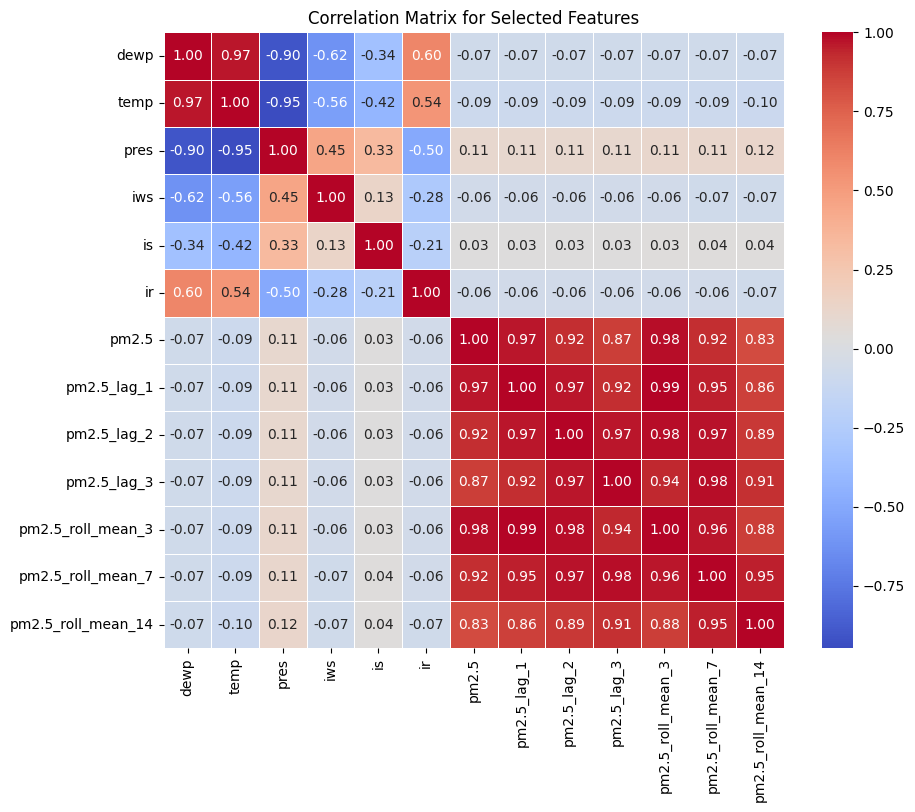

In [83]:
# Select the features of interest
selected_features = df.columns
df_selected = df[selected_features]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

Training LSTM model for PM 2.5
Epoch 1/50


/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/tejusdvscode/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2580 - val_loss: 0.0735
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0772 - val_loss: 0.0684
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0675 - val_loss: 0.0630
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0737 - val_loss: 0.0626
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0616 - val_loss: 0.0698
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0649 - val_loss: 0.0641
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0638 - val_loss: 0.0628
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0623 - val_loss: 0.0612
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0687 - val_loss: 0.0638
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0730 - val_loss: 0.0604
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0612 - val_loss: 0.0607
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━

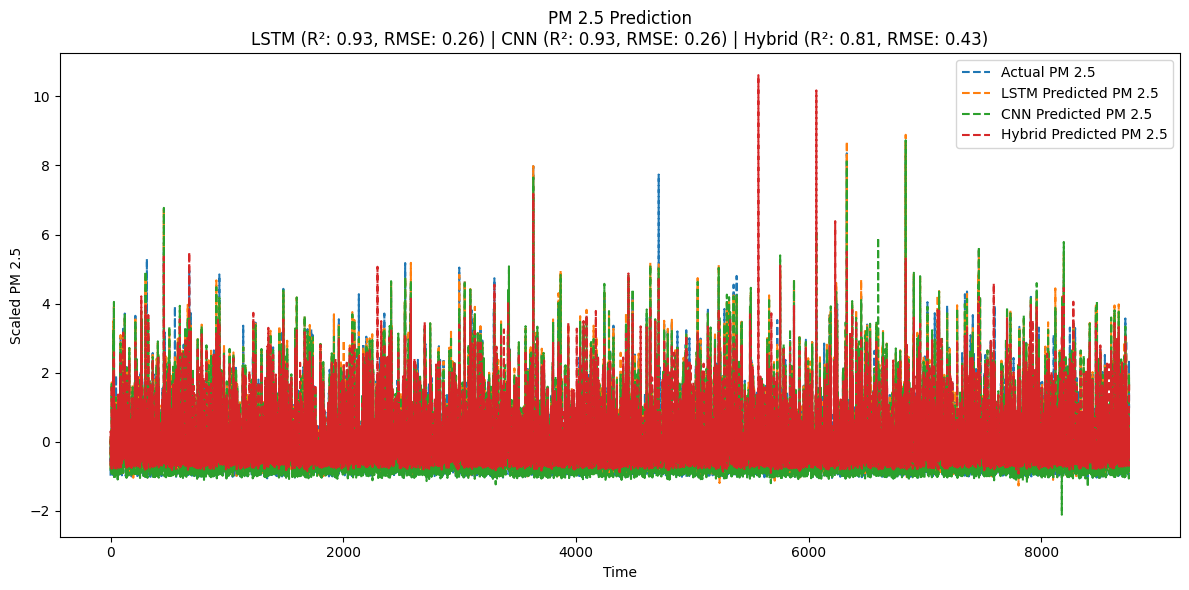

    Stock   LSTM_R²  LSTM_RMSE    CNN_R²  CNN_RMSE  Hybrid_R²  Hybrid_RMSE
0  PM 2.5  0.931163   0.258707  0.929936  0.261002   0.814005     0.425253


In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten, MaxPooling1D, Dropout
import matplotlib.pyplot as plt

# Placeholder for results
results = []

# Load the dataset (ensure `df_selected` is defined)
merged_df = df_selected.copy()
# Clean and standardize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()

# Define independent features and target variable
Independent_features = [col for col in merged_df.columns.tolist() if col not in ['pm2.5']]
target = 'pm2.5'
ts_data = merged_df[Independent_features + [target]].dropna()

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ts_data)
scaled_df = pd.DataFrame(scaled_data, columns=Independent_features + [target])

# Create sequences for modeling (LSTM, CNN, Hybrid)
timesteps = 10
X, y = [], []
for i in range(timesteps, len(scaled_df)):
    X.append(scaled_df.iloc[i-timesteps:i, :-1].values)
    y.append(scaled_df.iloc[i, -1])
X, y = np.array(X), np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')

# Define the Hybrid model (CNN + LSTM)
hybrid_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])
hybrid_model.compile(optimizer='adam', loss='mse')

# Train the models
print("Training LSTM model for PM 2.5")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("Training CNN model for PM 2.5")
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("Training Hybrid model for PM 2.5")
hybrid_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions with each model
lstm_y_pred = lstm_model.predict(X_test).flatten()
cnn_y_pred = cnn_model.predict(X_test).flatten()
hybrid_y_pred = hybrid_model.predict(X_test).flatten()

# Calculate R² and RMSE for each model
lstm_r2 = r2_score(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_y_pred))

cnn_r2 = r2_score(y_test, cnn_y_pred)
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_y_pred))

hybrid_r2 = r2_score(y_test, hybrid_y_pred)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_y_pred))

results.append({
    'Stock': 'PM 2.5',
    'LSTM_R²': lstm_r2,
    'LSTM_RMSE': lstm_rmse,
    'CNN_R²': cnn_r2,
    'CNN_RMSE': cnn_rmse,
    'Hybrid_R²': hybrid_r2,
    'Hybrid_RMSE': hybrid_rmse
})

# Plot predictions from all models
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual PM 2.5', linestyle='--')
plt.plot(lstm_y_pred, label='LSTM Predicted PM 2.5', linestyle='--')
plt.plot(cnn_y_pred, label='CNN Predicted PM 2.5', linestyle='--')
plt.plot(hybrid_y_pred, label='Hybrid Predicted PM 2.5', linestyle='--')
plt.title(f'PM 2.5 Prediction\nLSTM (R²: {lstm_r2:.2f}, RMSE: {lstm_rmse:.2f}) | CNN (R²: {cnn_r2:.2f}, RMSE: {cnn_rmse:.2f}) | Hybrid (R²: {hybrid_r2:.2f}, RMSE: {hybrid_rmse:.2f})')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Scaled PM 2.5')
plt.tight_layout()
plt.show()

# Create and display a DataFrame for the results
results_df = pd.DataFrame(results)
print(results_df)